# Sprint7
## K-meansスクラッチ

In [15]:
import numpy as np
import pandas as pd
from numpy.random import *
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

### クラスタリングのための人工データセット

In [16]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## データセット確認

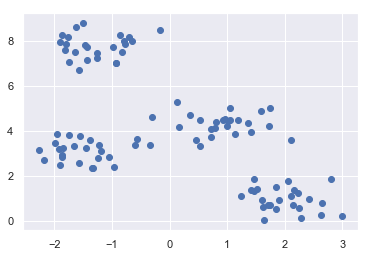

In [17]:
#データの可視化
plt.scatter(X[:,0],X[:,1])
plt.show()

## ScratchKMeansクラス

## 【問題5】繰り返し

In [18]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers=[]

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #各init_nの最適なSSEの値を格納する配列作成
        self.SSE_n_init=np.zeros(self.n_init)
        #中心点を格納する３次元配列作成（※n_init＊中心点の座標で３次元）
        self.centers_3d=np.zeros((self.n_init,self.n_clusters,X.shape[1]),dtype=np.int)
        for i in range(self.n_init):
            #中心点の初期値定義
            self._init_centers(X)
            #iter分のSSEを格納する配列作成
            self.SSE_iter=[]
            
            for j in range(self.max_iter):
                #中心点の更新
                self._sprit_class(X)
                self._move_centers(X)
                self.SSE_iter.append(self._SSE())
                #jが１以上の場合はSSE比較をし変動がなければbreak（※エラー対処）
                if j>=1:
                    if self.SSE_iter[-2]==self.SSE_iter[-1]:
                        break
                        
            #n_initのSSE配列に学習後のSSEを格納
            self.SSE_n_init[i]=self.SSE_iter[-1]
            #３d配列に学習後の中心点の座標を格納（SSEが最小の時）
            self.centers_3d[i,:,:]=self.centers
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の中心点：{}".format(i,self.center))
        #学習後の中心点格納
        self.result=self.centers_3d[self.SSE_n_init.argmin(),:,:]
        

        

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.result[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)
        
        return self.class_label
    
    def _init_centers(self,X):
        """
        中心点初期値を計算
        """
        #最初の確率は均等
        pr=np.repeat(1/X.shape[0],X.shape[0])
        self.centers_index=np.random.choice(range(X.shape[0]),self.n_clusters,replace=False,p=pr)
        self.centers=X[self.centers_index]
        init_centers=X[self.centers_index]
        return init_centers
        
    def _SSE(self):
        sse=self.distance.min(axis=1).sum()
        return sse
    
    def _sprit_class(self,X):
        """
        クラスタへの割り当て
        """
        self.distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.centers[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)

    def _move_centers(self,X):
        """
        中心点の移動
        """
        next_p=np.zeros((self.n_clusters,X.shape[1]))
        for i in range(self.n_clusters):
            next_p[i,:]=X[self.class_label==i,:].mean(axis=0)
        self.centers=next_p
        
    

In [19]:
class ScratchKMeans_():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers=[]

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #各init_nの最適なSSEの値を格納する配列作成
        self.SSE_n_init=np.zeros(self.n_init)
        #中心点を格納する３次元配列作成（※n_init＊中心点の座標で３次元）
        self.centers_3d=np.zeros((self.n_init,self.n_clusters,X.shape[1]),dtype=np.int)
        for i in range(self.n_init):
            #中心点の初期値定義
            self._init_centers(X)
            #iter分のSSEを格納する配列作成
            self.SSE_iter=[]
            
            for j in range(self.max_iter):
                #中心点の更新
                self._sprit_class(X)
                self._move_centers(X)
                self.SSE_iter.append(self._SSE())
                #jが１以上の場合はSSE比較をし変動がなければbreak（※エラー対処）
                if j>=1:
                    if self.SSE_iter[-2]==self.SSE_iter[-1]:
                        break
                        
            #n_initのSSE配列に学習後のSSEを格納
            self.SSE_n_init[i]=self.SSE_iter[-1]
            #３d配列に学習後の中心点の座標を格納（SSEが最小の時）
            self.centers_3d[i,:,:]=self.centers
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の中心点：{}".format(i,self.center))
        #学習後の中心点格納
        self.result=self.centers_3d[self.SSE_n_init.argmin(),:,:]
        

        

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.result[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)
        
        return self.class_label
    
    def _init_centers(self,X):
        """
        中心点初期値を計算
        """
        #最初の確率は均等
        pr=np.repeat(1/X.shape[0],X.shape[0])
        self.centers_index=np.random.choice(range(X.shape[0]),self.n_clusters,replace=False,p=pr)
        self.centers=X[self.centers_index]
        init_centers=X[self.centers_index]
        return init_centers
        
    def _SSE(self):
        sse=self.distance.min(axis=1).sum()
        return sse
    
    def _sprit_class(self,X):
        """
        クラスタへの割り当て
        """
        self.distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.centers[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)

    def _move_centers(self,X):
        """
        中心点の移動
        """
        next_p=np.zeros((self.n_clusters,X.shape[1]))
        for i in range(self.n_clusters):
            next_p[i,:]=X[self.class_label==i,:].mean(axis=0)
        self.centers=next_p
        
    

In [20]:
model=ScratchKMeans(4,5,10,0)

In [21]:
model.fit(X)

In [22]:
y=model.predict(X)

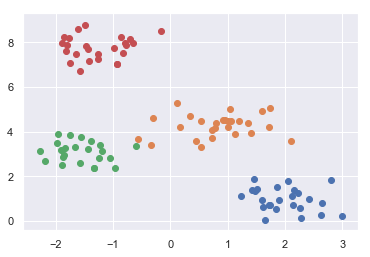

In [23]:
for i in range(4):
    plt.scatter(X[y==i,0],X[y==i,1])

## 【問題1】中心点の初期値を決める

In [24]:
n_class=4

In [25]:
"""
ランダムに中心点の初期座標を生成
"""
def _init_centers(n_class=4):
    centers=np.random.choice(range(X.shape[0]),n_class,replace=False)
    return centers

#動作確認
centers=_init_centers()

## 【問題2】SSEを求める関数の作成

In [26]:
def _SSE(distance):
    sse=distance.min(axis=1).sum()
    return sse

## 【問題3】クラスタへの割り当て

In [27]:
distance=np.zeros((X.shape[0],n_class))
for i in range(n_class):
    distance[:,i]=np.linalg.norm(X-X[centers[i]],axis=1)
dis_min=distance.argmin(axis=1)

## 【問題4】中心点の移動

In [28]:
next_p=np.zeros((n_class,X.shape[1]))
for i in range(n_class):
    next_p[i]=X[dis_min==i,:].mean(axis=0)

## 【問題6】異なる初期値で計算

In [29]:
model2=ScratchKMeans(4,10,10,0)

In [30]:
model2.fit(X)

In [31]:
y2=model2.predict(X)

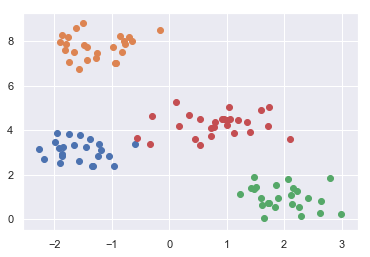

In [32]:
for i in range(4):
    plt.scatter(X[y2==i,0],X[y2==i,1])

## 【問題7】推定

In [33]:
y

array([1, 3, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 0, 0, 1, 2, 0, 1, 3,
       2, 0, 1, 2, 1, 1, 0, 0, 0, 3, 0, 0, 2, 1, 3, 0, 3, 2, 1, 2, 3, 2,
       2, 3, 0, 2, 1, 1, 1, 0, 2, 2, 2, 3, 3, 0, 0, 3, 3, 0, 0, 1, 0, 3,
       2, 2, 0, 1, 3, 0, 1, 3, 1, 1, 2, 2, 0, 0, 0, 3, 2, 1, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 2, 2, 3, 3, 2, 3, 1])

## 【問題8】エルボー法の実装

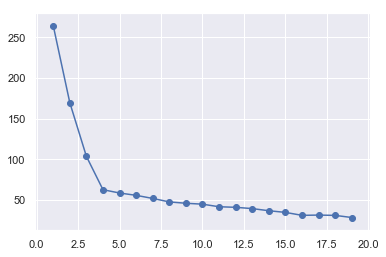

In [34]:
SSE=[]
for i in range(1,20):
    el=ScratchKMeans(i,5,10,0)
    el.fit(X)
    SSE.append(el.SSE_n_init.min())
plt.plot(range(1,20),SSE)
plt.scatter(range(1,20),SSE)
plt.show()

# クラスタ分析

In [35]:
data=pd.read_csv("Wholesale customers data.csv")

In [22]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [36]:
#8→６次元へ
data_drop=data.drop(columns=["Channel","Region"])
data_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [37]:
#データ対数化
data_log=np.log(data_drop)

In [38]:
#データ標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_std=sc.fit_transform(data_log)

In [39]:
#次元削減（scikit-learnによるPCAのサンプルコード）
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_std)
data_pca = pca.transform(data_std)

In [40]:
data_pca.shape

(440, 2)

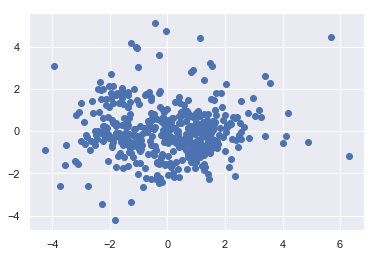

In [41]:
#次元削減後のデータ可視化
plt.scatter(data_pca[:, 0], data_pca[:, 1])

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


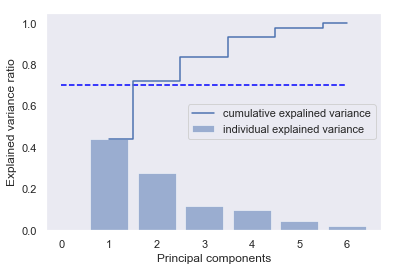

In [42]:
#PCAの分散説明率を表示するコードサンプル
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [43]:
skm=ScratchKMeans(4,5,10,0)
skm.fit(data_pca)
pred=skm.predict(data_pca)

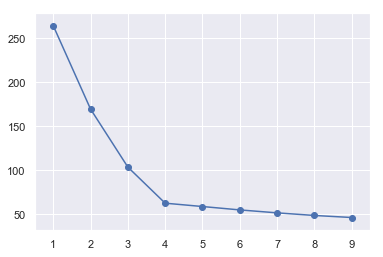

In [44]:
## 【問題10】クラスタ数kの選択
SSE=[]
for i in range(1,10):
    el=ScratchKMeans(i,5,10,0)
    el.fit(X)
    SSE.append(el.SSE_n_init.min())
plt.plot(range(1,10),SSE)
plt.scatter(range(1,10),SSE)
plt.show()

エルボー法より、クラス数４からSSEの減少率が低下しているため、クラス数４が適切だと判断し分析を行う。

## 【問題11】既知のグループとの比較

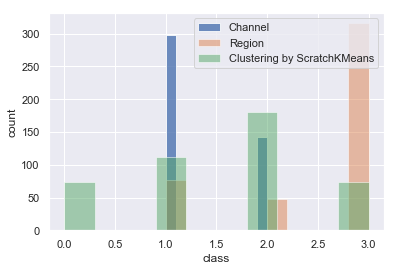

In [45]:
plt.hist(data["Channel"],alpha=0.8, label="Channel")
plt.hist(data["Region"],alpha=0.5,label="Region")
plt.hist(pred,alpha=0.5,label="Clustering by ScratchKMeans")
plt.xlabel("class")
plt.ylabel("count")
plt.legend()
plt.show()

Chanel,Region,Clustering by ScratchKMeans(以降SKM)のラベル２のグループが類似している

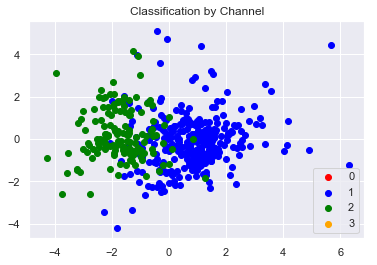

In [46]:
c=["red","blue","green","orange"]
for i in range(4):
    plt.scatter(data_pca[data["Channel"]==i,0],data_pca[data["Channel"]==i,1],c=c[i],label=i)
plt.legend()
plt.title("Classification by Channel");

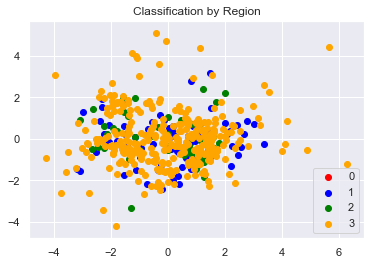

In [47]:
for i in range(4):
    plt.scatter(data_pca[data["Region"]==i,0],data_pca[data["Region"]==i,1],c=c[i],label=i)
plt.legend()
plt.title("Classification by Region");

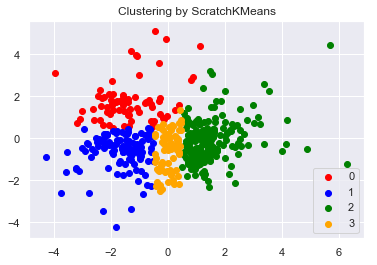

In [48]:
for i in range(4):
    plt.scatter(data_pca[pred==i,0],data_pca[pred==i,1],c=c[i],label=i)
plt.legend()
plt.title("Clustering by ScratchKMeans");

Chanel,SKMは重なる部分が多いように思える。双方のクラスタリングを比較することにより発見があるかもしれない

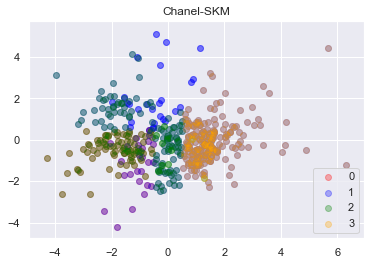

In [36]:
#ChanelとSKMを重ねて表示
for i in range(4):
    plt.scatter(data_pca[data["Channel"]==i,0],data_pca[data["Channel"]==i,1],c=c[i],alpha=0.3)
    plt.scatter(data_pca[pred==i,0],data_pca[pred==i,1],c=c[i],alpha=0.3,label=i)
plt.legend()
plt.title("Chanel-SKM")    ;

Chanel,SKMを重ねて可視化したが、わかりづらい（笑）
よく観察するとChanel１はクラス２、３,Channel2はクラス０、１と重なる部分が多く見える

In [50]:
data2=data.copy()
data2["SKMclass"]=pred

- FRESH: 新鮮な製品の年間支出
- MILK: 乳製品の年間支出
- GROCERY: 食料品の年間支出
- FROZEN: 冷凍製品の年間支出
- DETERGENTS_PAPER: 洗剤および紙製品の年間支出
- DELICATESSEN: デリカッセン（サンドイッチ等）の年間支出

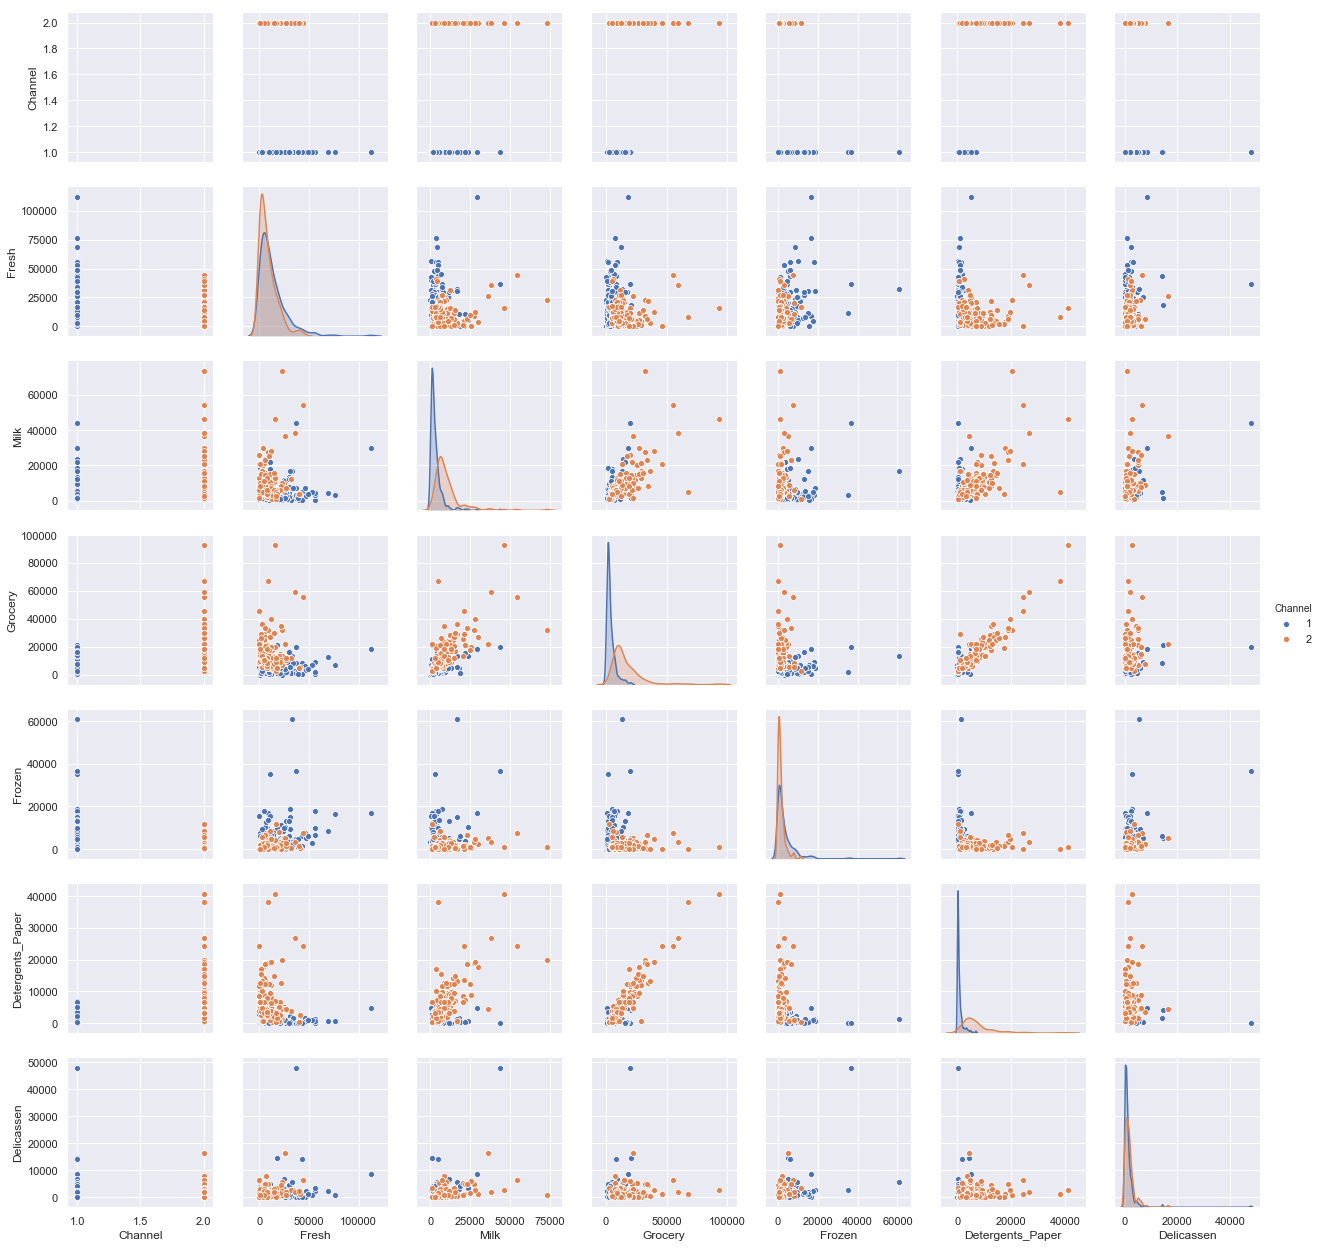

In [151]:
#Channelのペアプロット
sns.pairplot(data2.drop(columns=["Region","SKMclass"]), hue='Channel');

上図から、Chanel１はMilk、Grocery、Detergents_Paper、Delicassen、Channel2はFresh、Frozenと上回る消費の分布が異なる。
このことからChanel１は宿泊業、飲食サービス業による消費、Channel2は小売業による消費と考える。

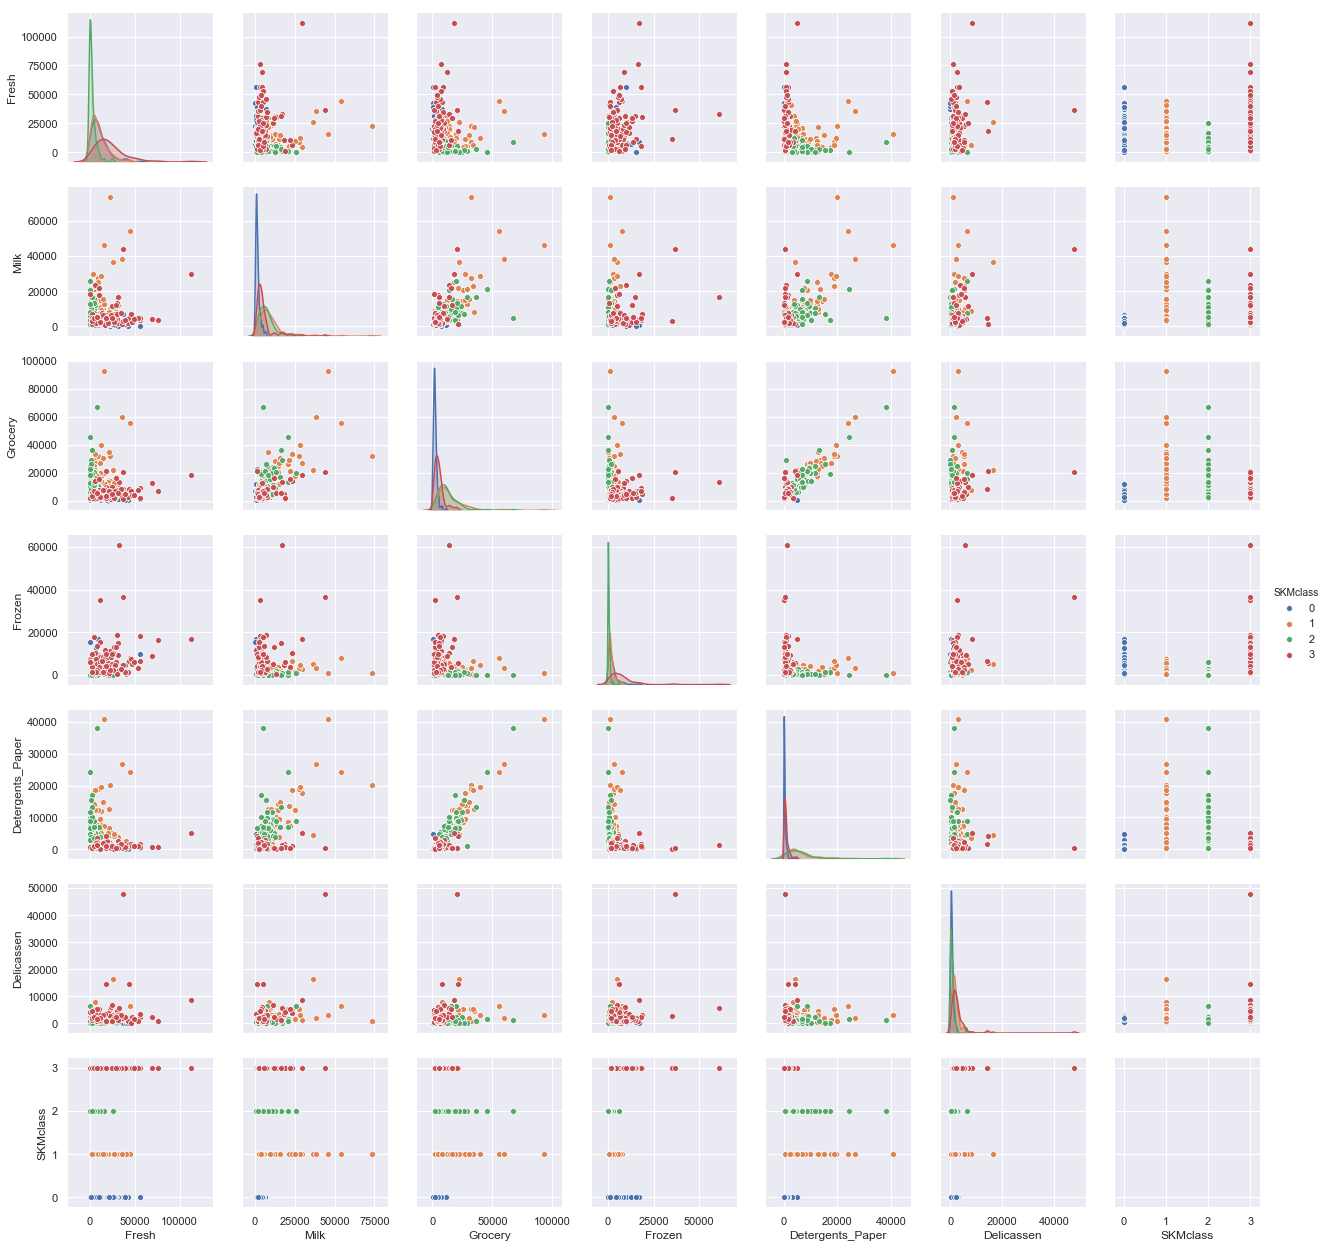

In [150]:
#SKMclassのペアプロット
sns.pairplot(data2.drop(columns=["Channel","Region"]), hue='SKMclass');

Chanel１（青・黄）は宿泊業、飲食サービス業と仮定し消費の分布や散布図を比較すると、クラス１（黄）の消費金額はDetergents_Paper、Milk、Groceryにおいてクラス０（青）を上回る。このことからクラス１は宿泊業と推定できる。一方のクラス０（青）は、先に挙げた項目の消費は少なく、Fresh、Frozenの消費分布が一定額に針状に突出するよう集中していることから飲食サービス業だと考えられる。
Chanel２（緑・赤）について、小売業と仮定し比較すると、クラス２（緑）は低額かつ一定額に分布が集中していることからスーパーマーケットの可能性が高いと考えられる。一方のクラス３(赤)は消費分布がやや広く、外れ値も見られることから、デパートなのではないかと考えることもできる。

## 【問題12】卸売業者にとって有益な情報

In [51]:
data2.groupby(["Channel","Region","SKMclass"]).sum().round()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region SKMclass                                                       
1       1      0            8712   27190    23655    2775              5885   
               1           98433  104091    92904   28083             22585   
               2          373637   50573    66446   93990             14406   
               3          280451   46488    54537   59664             13205   
        2      1           32717   16784    13626   60869              1272   
               2          245292   36199    75264   95193              7801   
               3           48206   11536    34184    4799              4443   
        3      0           78693  105371   155918   12365             53937   
               1          382036  163635   185246   99185             31466   
               2         1638786  215831   253136  421262             38441   
               3          828754  250916   225801  238794             42146   
2       1      0           12695   62935   122101    6569             53556   
               1           67043  122661   199514   26012             92756   
               3           13862    8516    10880   13933              1743   
        2      0           30380   73974   182909    7368            105025   
               1           91303   99723   124548   10344             54438   
               2           16823     928     2743   11559               332   
        3      0           82063  275893   492517   12411            214003   
               1          839832  855820  1148564  131676            500211   
               2           13146    1124     4523    1420               549   
               3           97267   20169    29546   13379              9657   

                         Delicassen  
Channel Region SKMclass              
1       1      0               1581  
               1              24413  
               2              28432  
               3              16206  
        2      1               5609  
               2              19225  
               3               6131  
        3      0              11079  
               1             115583  
               2             100584  
               3              93112  
2       1      0              12716  
               1              17482  
               3               3497  
        2      0               5824  
               1              14231  
               2               3486  
        3      0              26578  
               1             160662  
               2                497  
               3               4015

In [52]:
data2.groupby(["Channel","Region","SKMclass"]).mean().round()

Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
Channel Region SKMclass                                                         
1       1      0          2178.0   6798.0   5914.0    694.0            1471.0   
               1          9843.0  10409.0   9290.0   2808.0            2258.0   
               2         11322.0   1533.0   2014.0   2848.0             437.0   
               3         23371.0   3874.0   4545.0   4972.0            1100.0   
        2      1         32717.0  16784.0  13626.0  60869.0            1272.0   
               2         11150.0   1645.0   3421.0   4327.0             355.0   
               3          9641.0   2307.0   6837.0    960.0             889.0   
        3      0          3577.0   4790.0   7087.0    562.0            2452.0   
               1         25469.0  10909.0  12350.0   6612.0            2098.0   
               2         13216.0   1741.0   2041.0   3397.0             310.0   
               3         16575.0   5018.0   4516.0   4776.0             843.0   
2       1      0          1814.0   8991.0  17443.0    938.0            7651.0   
               1          7449.0  13629.0  22168.0   2890.0           10306.0   
               3          6931.0   4258.0   5440.0   6966.0             872.0   
        2      0          3376.0   8219.0  20323.0    819.0           11669.0   
               1         10145.0  11080.0  13839.0   1149.0            6049.0   
               2         16823.0    928.0   2743.0  11559.0             332.0   
        3      0          2647.0   8900.0  15888.0    400.0            6903.0   
               1         12350.0  12586.0  16891.0   1936.0            7356.0   
               2         13146.0   1124.0   4523.0   1420.0             549.0   
               3         19453.0   4034.0   5909.0   2676.0            1931.0   

                         Delicassen  
Channel Region SKMclass              
1       1      0              395.0  
               1             2441.0  
               2              862.0  
               3             1350.0  
        2      1             5609.0  
               2              874.0  
               3             1226.0  
        3      0              504.0  
               1             7706.0  
               2              811.0  
               3             1862.0  
2       1      0             1817.0  
               1             1942.0  
               3             1748.0  
        2      0              647.0  
               1             1581.0  
               2             3486.0  
        3      0              857.0  
               1             2363.0  
               2              497.0  
               3              803.0

In [55]:
data2.groupby(["Region"]).sum().round()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,SKMclass
Region,,,,,,,,
1,95,854833,422454,570037,231026,204136,104327,127
2,66,464721,239144,433274,190132,173311,54506,71
3,421,3960577,1888759,2495251,930492,890410,512110,498


In [58]:
Region_SKM = data2.groupby(["Region","SKMclass"]).sum().round()
Region_SKM

Channel    Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region SKMclass                                                                 
1      0              18    21407    90125   145756    9344             59441   
       1              28   165476   226752   292418   54095            115341   
       2              33   373637    50573    66446   93990             14406   
       3              16   294313    55004    65417   73597             14948   
2      0              18    30380    73974   182909    7368            105025   
       1              19   124020   116507   138174   71213             55710   
       2              24   262115    37127    78007  106752              8133   
       3               5    48206    11536    34184    4799              4443   
3      0              84   160756   381264   648435   24776            267940   
       1             151  1221868  1019455  1333810  230861            531677   
       2             126  1651932   216955   257659  422682             38990   
       3              60   926021   271085   255347  252173             51803   

                 Delicassen  
Region SKMclass              
1      0              14297  
       1              41895  
       2              28432  
       3              19703  
2      0               5824  
       1              19840  
       2              22711  
       3               6131  
3      0              37657  
       1             276245  
       2             101081  
       3              97127

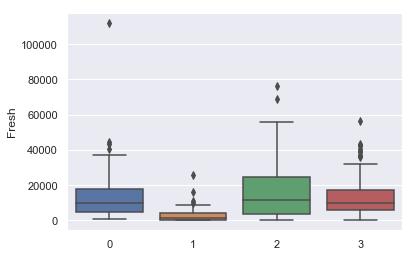

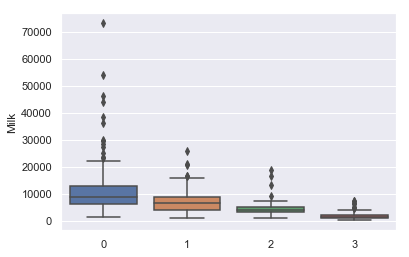

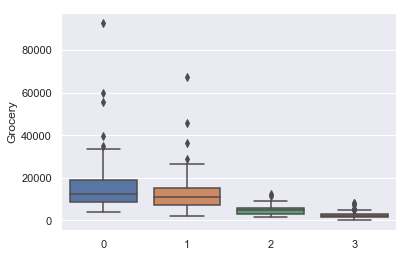

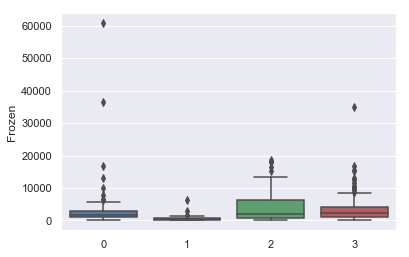

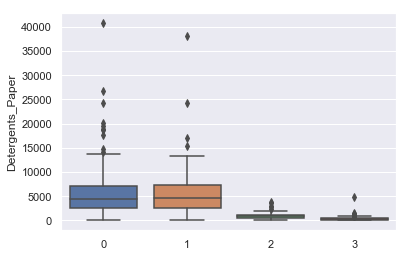

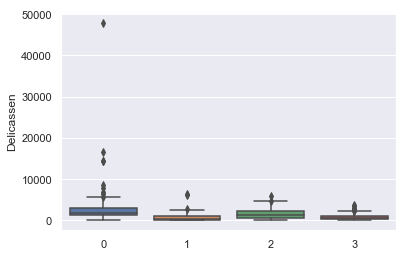

In [38]:
y_pred=skm.predict(data_pca)
data = pd.read_csv("Wholesale customers data.csv")
data = data.drop(["Channel", "Region"], axis=1)

for column in data.columns:
    sns.boxplot(x=y_pred, y=column, data=data)
    plt.show()

分析結果：
#### Chanel１：宿泊業、飲食サービス業
#### クラス０：飲食サービス業

おすすめ商品：Detergents_Paper、Milk、Grocery、Fresh

===============================================

#### クラス１：宿泊業

おすすめ商品：Detergents_Paper、Milk、Grocery

===============================================

#### Chanel２：小売業
#### クラス２：スーパーマーケット

おすすめ商品：Fresh、Frozen

===============================================-

#### クラス３：デパート

おすすめ商品：Fresh、Frozen　（Chanel１には劣るがDetergents_Paper、Milk、Grocery）